In [253]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Read in data from the csv file
df = pd.read_csv('movie data.csv')

In [254]:
# Preview the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [255]:
# Check how many rows there are
orig_row_num = len(df['name'])
print(str(orig_row_num) + ' rows')

7668 rows


In [256]:
# Check for any missing data
for col in df.columns:
    p_missing = np.mean(df[col].isnull()) * 100
    print('missing {}: {}%'.format(col, round(p_missing, 2)))

missing name: 0.0%
missing rating: 1.0%
missing genre: 0.0%
missing year: 0.0%
missing released: 0.03%
missing score: 0.04%
missing votes: 0.04%
missing director: 0.0%
missing writer: 0.04%
missing star: 0.01%
missing country: 0.04%
missing budget: 28.31%
missing gross: 2.46%
missing company: 0.22%
missing runtime: 0.05%


In [257]:
# Drop all rows with missing values from the dataset and check how many rows remain
df = df.dropna()
rem_row_num = len(df['name'])
print(str(orig_row_num - rem_row_num) + ' rows dropped')
print(str(rem_row_num) + ' rows remain')

2247 rows dropped
5421 rows remain


In [258]:
# Check the data types of the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [259]:
# Change the data types of columns from floats to ints where necessary
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [260]:
# Create a column with the correct release years and remove the old year column
df['correct_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype('int64')
del df['year']

In [261]:
# View the rows sorted by gross (descending)
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


In [262]:
# Drop all duplicate rows from the dataset
df = df.drop_duplicates()

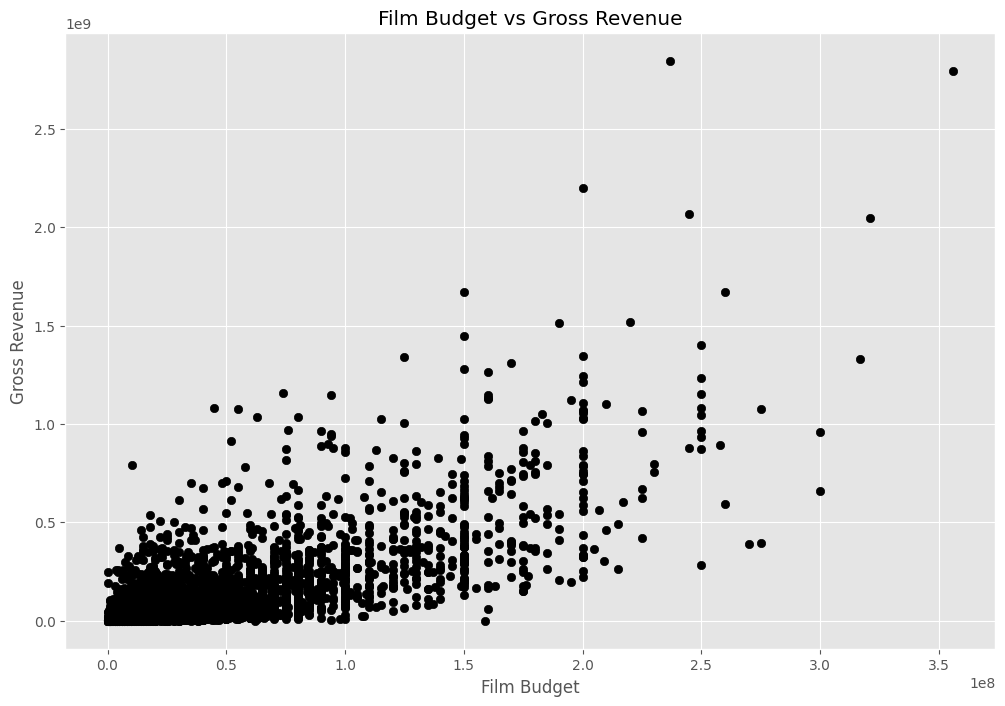

In [263]:
# Build a scatter plot displaying budget vs gross using matplotlib
plt.scatter(x=df['budget'], y=df['gross'], c='black')
plt.title('Film Budget vs Gross Revenue')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')
plt.show()

Text(0, 0.5, 'Gross Revenue')

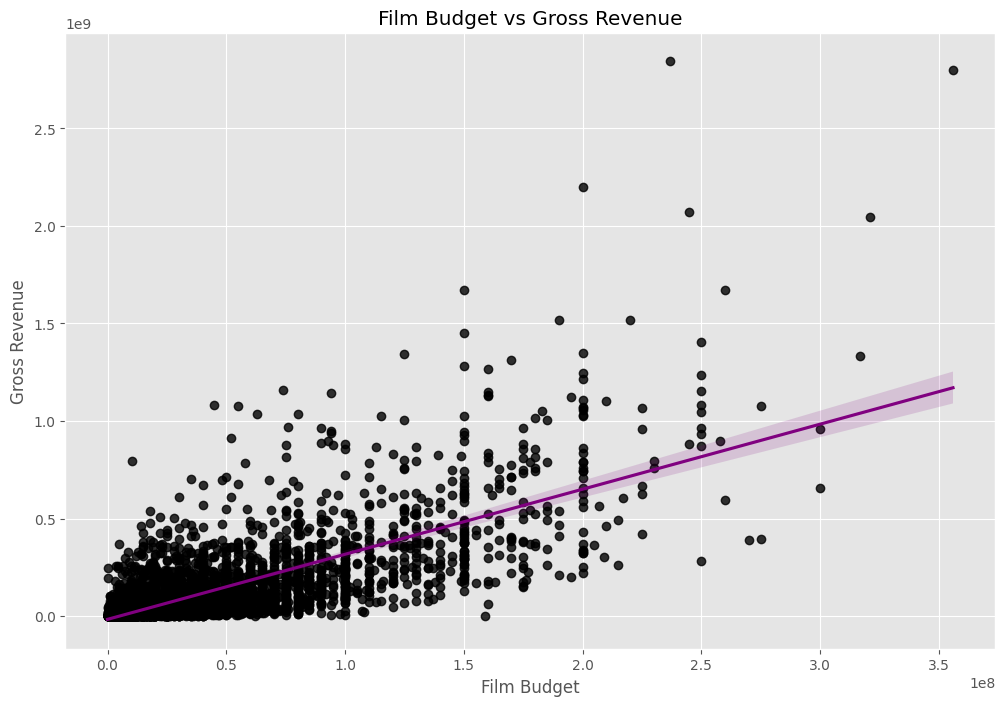

In [264]:
# Build a scatter plot (with regression line) displaying budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'black'}, line_kws={'color':'purple'})
plt.title('Film Budget vs Gross Revenue')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')

In [265]:
# Look at the correlation between different columns in the dataset (numeric metrics only)
corr_matrix = df.corr(method='pearson', numeric_only=True)
corr_matrix

,score,votes,budget,gross,runtime,correct_year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correct_year,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


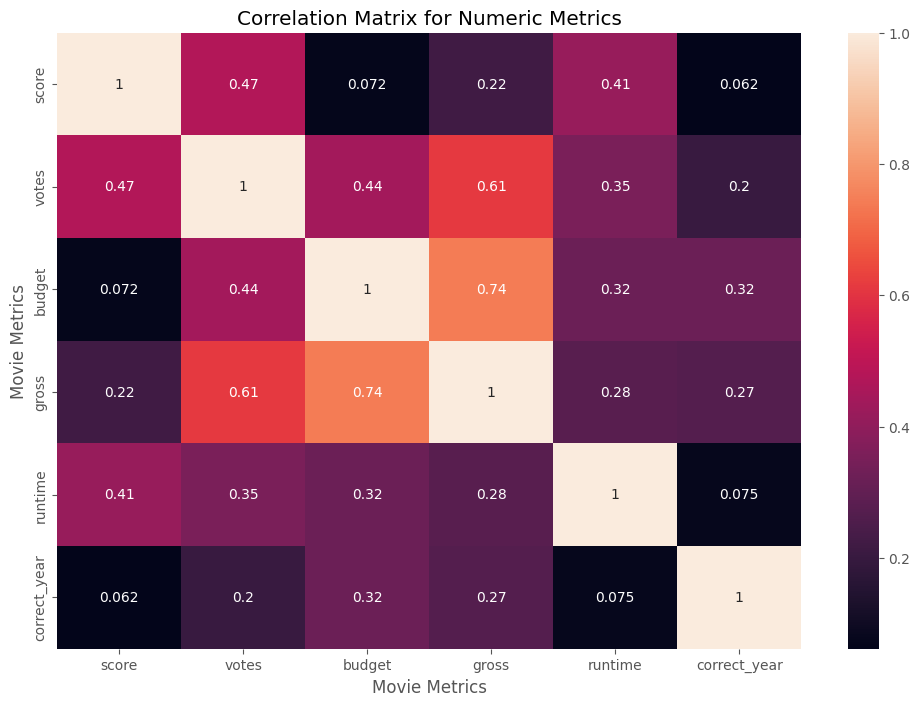

In [266]:
# Create a heatmap displaying the correlation between different columns in the dataset using seaborn (numeric metrics only)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Metrics')
plt.xlabel('Movie Metrics')
plt.ylabel('Movie Metrics')
plt.show()

In [267]:
# Create a new dataset that assigns numeric values for all non-numeric values in the original dataset and preview it
numeric_df = df
for col in numeric_df.columns:
    if(numeric_df[col].dtype == 'object'):
       numeric_df[col] = numeric_df[col].astype('category')
       numeric_df[col] = numeric_df[col].cat.codes
numeric_df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,4692,6,6,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980
1,3929,6,1,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980
2,3641,4,0,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980
3,204,4,4,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980
4,732,6,4,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980


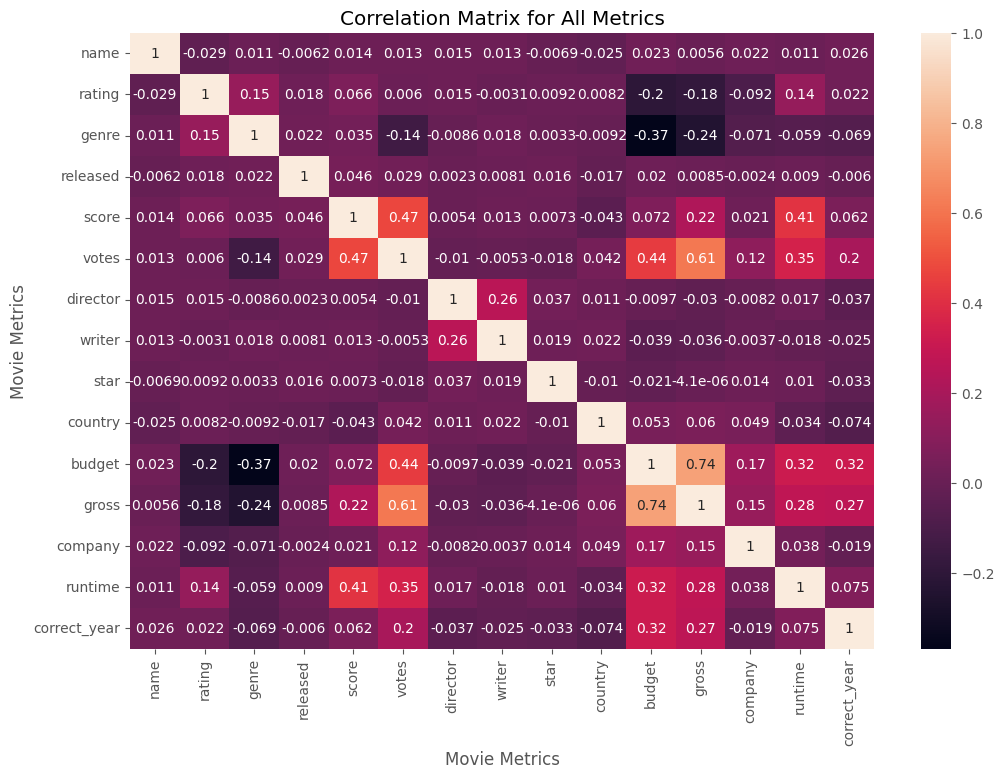

In [268]:
# Create a heatmap displaying the correlation between different columns in the dataset using seaborn (all metrics)
corr_matrix = numeric_df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for All Metrics')
plt.xlabel('Movie Metrics')
plt.ylabel('Movie Metrics')
plt.show()

In [269]:
# Narrow down on metrics that have significant correlation
corr_pairs = corr_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values()
high_corr = sorted_corr_pairs[sorted_corr_pairs > .5]
high_corr = high_corr[high_corr != 1]
high_corr

votes   gross     0.614751
gross   votes     0.614751
budget  gross     0.740247
gross   budget    0.740247
dtype: float64

Text(0, 0.5, 'Gross Revenue')

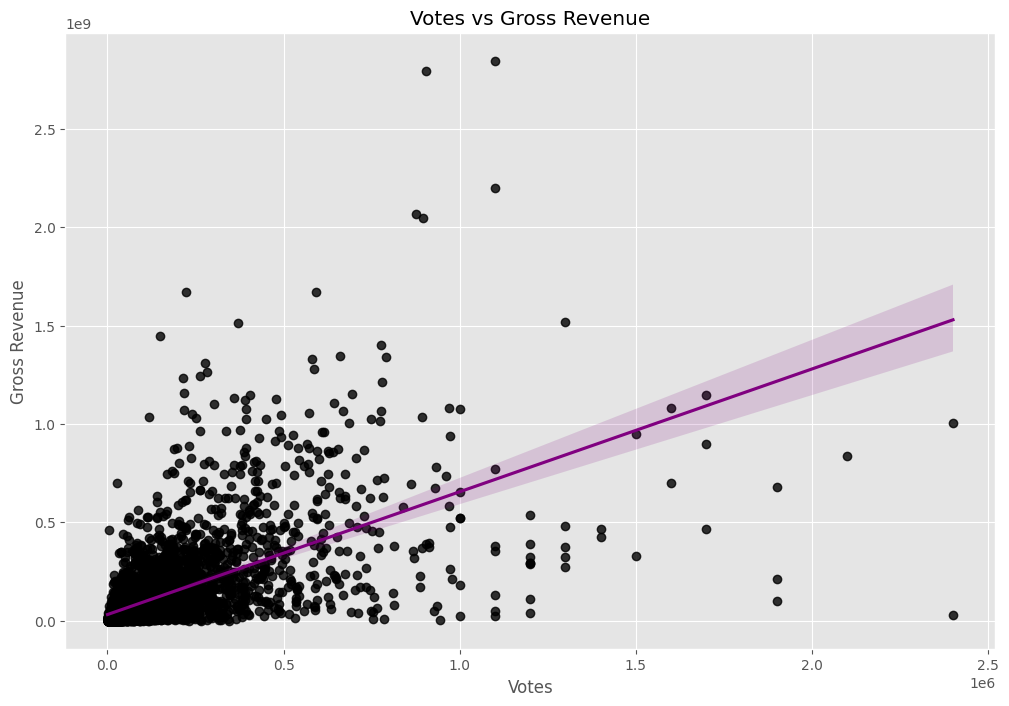

In [270]:
# Build a scatter plot (with regression line) displaying votes vs gross using seaborn
sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color':'black'}, line_kws={'color':'purple'})
plt.title('Votes vs Gross Revenue')
plt.xlabel('Votes')
plt.ylabel('Gross Revenue')